In [253]:
import pandas as pd
import numpy as np

#  Data Importing from https://www2.stetson.edu/~jrasp/data.htm 
# Titanic Dataset 

In [254]:
df=pd.read_csv("Titanic.csv")

In [255]:
df.shape

(2201, 6)

In [235]:
df.head(2200)

,CLASS,AGE,SEX,SURVIVE,Unnamed: 4,CLASS.1
0,1,1,1,1,NaN,0=crew
1,1,1,1,1,NaN,1=first
2,1,1,1,1,NaN,2=second
3,1,1,1,1,NaN,3=third
4,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...
2195,0,1,0,1,NaN,NaN
2196,0,1,0,1,NaN,NaN
2197,0,1,0,1,NaN,NaN
2198,0,1,0,0,NaN,NaN


#  Splitting feature vectors and labels

In [256]:
# X is feature vectors
X = df[['CLASS', 'AGE', 'SEX']]

In [257]:
X.head(2200)

,CLASS,AGE,SEX
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
2195,0,1,0
2196,0,1,0
2197,0,1,0
2198,0,1,0


In [258]:
# Y is labels

In [259]:
Y = df[['SURVIVE']]

In [260]:
Y.head(2200)

,SURVIVE
0,1
1,1
2,1
3,1
4,1
...,...
2195,1
2196,1
2197,1
2198,0


#  Covariance Matrix of features

In [242]:
covariance_matrix = np.cov(X.T) #Transposing Features and passing it into nupy Covarience matrix
print(covariance_matrix)

[[ 1.67928834 -0.0644488  -0.13709368]
 [-0.0644488   0.04709182  0.00987464]
 [-0.13709368  0.00987464  0.1680166 ]]


#  Eigen Vectors and Eigen Values from Covariance Matrix

In [243]:
# Lingalg.eig() is used to calculate Eigen values and Eigen Vectors
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

In [244]:
print('Eigenvectors \n%s' %eig_vectors)

Eigenvectors 
[[ 0.99519049 -0.09109357 -0.03602571]
 [-0.03947786 -0.03638278 -0.99855786]
 [-0.08965148 -0.9951775   0.03980398]]


In [245]:
print('\nEigen Values \n %s' %eig_values)


Eigen Values 
 [1.69419499 0.15582874 0.04437303]


In [246]:
# I reduce dimension to 1 dimension, since 1 eigenvector has 89.43% variances
(100*(eig_values[0] / sum(eig_values)))

89.4318983275998

# Projecting data point onto selected Eigen Vector

In [247]:
eig_vectors.T[0]

array([ 0.99519049, -0.03947786, -0.08965148])

In [248]:
Projected_X = X.dot(eig_vectors.T[0])

In [249]:
result = pd.DataFrame(Projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['Survive'] = Y

In [261]:
result.head(2200)

,PC1,y-axis,Survive
0,0.866061,0.0,1
1,0.866061,0.0,1
2,0.866061,0.0,1
3,0.866061,0.0,1
4,0.866061,0.0,1
...,...,...,...
2195,-0.039478,0.0,1
2196,-0.039478,0.0,1
2197,-0.039478,0.0,1
2198,-0.039478,0.0,0


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA result')

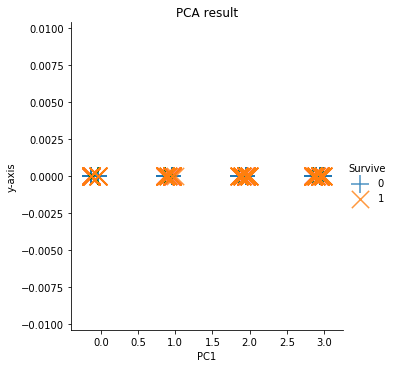

In [252]:
# since implot function works on 2 Dimensional Data so I have used y axis as input
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 300}, # marker size
           hue="Survive",markers=["+", "x"]) # color

#  For Title
plt.title('PCA result')